**Importing libraries and data**

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
from pylab import rcParams

df = pd.read_csv("../../dataset/cleaned.csv")

df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_timedelta(df['Time'])
df['DateTime'] = pd.to_datetime(df['DateTime'])


/home/srikumar/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
minlyGAP = df.groupby('DateTime')['Global_active_power'].sum().reset_index()
minlyGAP = minlyGAP.set_index('DateTime')

**Decomposing the signal**


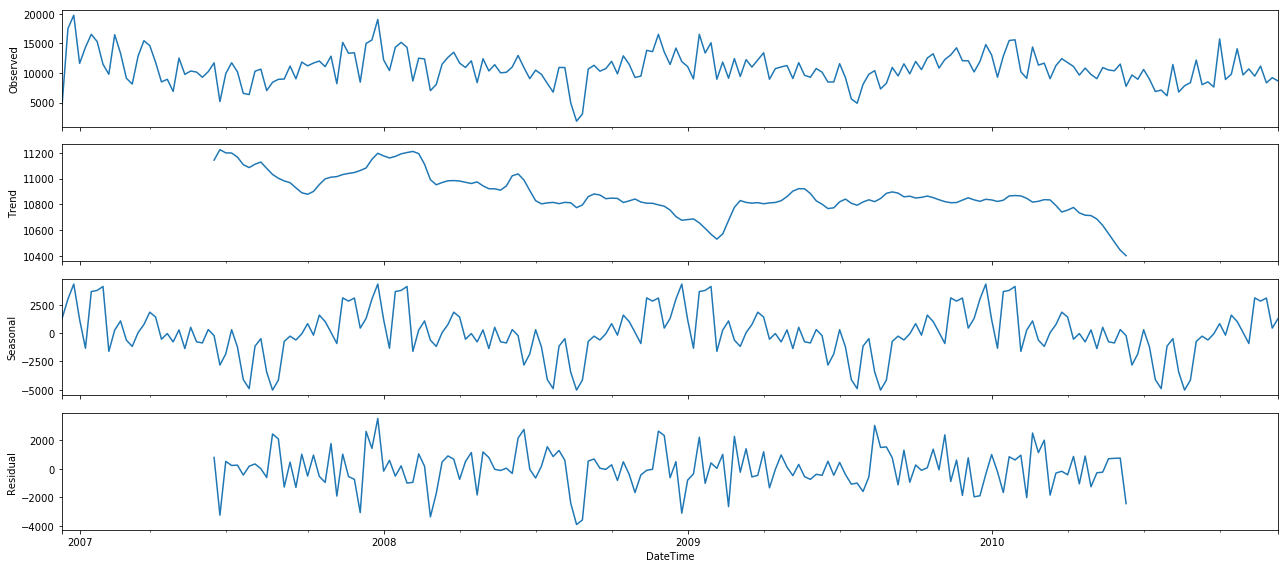

In [3]:
weeklyGAP = minlyGAP['Global_active_power'].resample('W').sum()

rcParams['figure.figsize'] = 18,8

decomposition = sm.tsa.seasonal_decompose(weeklyGAP, model='additive')
fig = decomposition.plot()
plt.show()


**Analysis**
<br>
The data when sampled weekly has as strong seasonal component and non-uniform trend. It also has a residuals of high magnitude. This conveys that better methods are needed to predict this time series than AR or MA. ARIMA with a higher order of integration is needed. As differencing is likely to make the series stationary. 